# wilcow: exploring a simplified Wilson-Cowan model of homogeneous excitatory and inhibitory populations

The firing rate of the excitatory neurons is $r_{E}$ , and that of the inhibitory neurons is $r_{I}$ and these are characterized by equations:

\begin{align}
\tau_E \frac{dr_{E}}{dt} &= -r_{E} + R(M_{EE}r_{E}+M_{EI}{r}_{I} - \gamma_{E}) \\
\tau_I \frac{dr_{I}}{dt} &= -r_{I} + R(M_{IE}r_{E}+M_{II}{r}_{I} - \gamma_{I}) \\
\end{align}

where $R(x) =  max(0, x)$.

Let's set $M_{EE} = 1.25, M_{IE} = 1, M_{II} = 0, M_{EI} = −1, \gamma_{E} = −10 Hz$ (constant background activity)$, \gamma_{I} = 10 Hz, \tau_{E} = 10 ms$, and vary the value of $\tau_{I}$. 

In [34]:
!pip install ipympl==0.8.8 --quiet

In [35]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB:
  from google.colab import output, widgets
  output.enable_custom_widget_manager()

In [36]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [37]:
# @title Make plots nicer  -- Execute this cell
def mystyle():
  """
  Create custom plotting style.

  Returns
  -------
  my_style : dict
      Dictionary with matplotlib parameters.

  """
  # color pallette
  style = {
      # Use LaTeX to write all text
      "text.usetex": False,
      "font.family": "DejaVu Sans",
      "font.weight": "bold",
      # Use 16pt font in plots, to match 16pt font in document
      "axes.labelsize": 16,
      "axes.titlesize": 20,
      "font.size": 16,
      # Make the legend/label fonts a little smaller
      "legend.fontsize": 14,
      "xtick.labelsize": 14,
      "ytick.labelsize": 14,
      "axes.linewidth": 2.5,
      "lines.markersize": 10.0,
      "lines.linewidth": 2.5,
      "xtick.major.width": 2.2,
      "ytick.major.width": 2.2,
      "axes.labelweight": "bold",
      "axes.spines.right": False,
      "axes.spines.top": False
  }

  return style


plt.style.use("seaborn-colorblind")
plt.rcParams.update(mystyle())

In [38]:
def ramp(x):
  return max(0, x)

In [39]:
# Time parameters
dt = 0.1  # ms
T = 1000  # ms
steps = int(T/dt)  # sample points
# Vectors
time = np.linspace(0, T, steps+1)
rE = np.zeros((steps+1, ))
rI = np.zeros((steps+1, ))
# Rate model pameters
# thres* (Hz)
# tau* (ms)
MEE = 1.25  # From E to E
MEI = -1  # From I to E
MIE = 1  # From E to I
MII = 0  # From I to I
thresE = -10
thresI = 10
tauE = 10.0
init_tauI = 20 
tauI_min = 1
tauI_max = 50
tauI_transition = 40
rE_init_min = 40
rE_init_max = 60
rI_init_min = 20
rI_init_max = 30

In [40]:
def rates(tauI):
    # Set initial values based on Fig. 7.18A (τΙ = 30 ms) and Fig. 7.19A (τΙ = 50 ms).
    # τΙ = 40 ms is the transition value between stable and unstable fixed point.
    # IMPROVE: Assign mathematical correct initial values that are a function of tauI or other parameters.
    if tauI < tauI_transition:
        rE[0] = 50
        rI[0] = 30
    else:
        rE[0] = 40
        rI[0] = 20
    # Derive rate equations numerically
    for n in range(steps):
        derivE = (-rE[n] + ramp(MEE*rE[n] + MEI*rI[n] - thresE)) / tauE
        rE[n+1] = rE[n] + dt * derivE
        derivI = (-rI[n] + ramp(MIE*rE[n] + MII*rI[n] - thresI)) / tauI
        rI[n+1] = rI[n] + dt * derivI
    return rE, rI

In [41]:
# Plot parameters
rE_ylim = [0, rE_init_max]
rE_yticks_step = 20
rE_yticks = np.arange(0, rE_init_max + rE_yticks_step, rE_yticks_step)
rI_ylim = [0, rE_init_min]
rI_yticks_step = 10
rI_yticks = np.arange(0, rE_init_min+rI_yticks_step, rI_yticks_step)
tauI_slider_margin = 0.25
tauI_slider_valstep = 1

In [42]:
def plot_rates(title, tauI):
    fig, (rE_axis, rI_axis) = plt.subplots(2)
    fig.suptitle(title)
    rE, rI = rates(tauI)
    rE_line, = rE_axis.plot(time, rE, 'tab:green', lw=2)
    rE_axis.set_ylim(rE_ylim)
    rE_axis.set_yticks(rE_yticks)
    rE_axis.set_ylabel('rE (Hz)')
    rE_axis.set_xlabel('t (ms)')
    rE_axis.autoscale_view()
    rI_line, = rI_axis.plot(time, rI, 'tab:red', lw=2)
    rI_axis.set_ylim(rI_ylim)
    rI_axis.set_yticks(rI_yticks)
    rI_axis.set_ylabel('rI (Hz)')
    rI_axis.set_xlabel('t (ms)')
    rI_axis.autoscale_view()
    fig.tight_layout()
    fig.canvas.draw_idle()
    return fig, rE_line, rI_line

In [43]:
def make_update_tauI_callback(fig, rE_line, rI_line):
    def update_tauI(new_tauI):
        rE, rI = rates(new_tauI)
        rE_line.set_ydata(rE)
        rI_line.set_ydata(rI)
        fig.canvas.draw_idle()
    return update_tauI

0

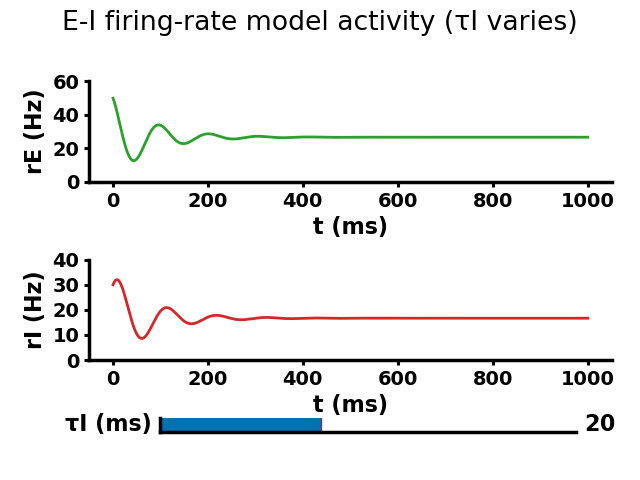

In [44]:
# Plot rates
fig, rE_line, rI_line = plot_rates(
    title='E-I firing-rate model activity (τI varies)',
    tauI=init_tauI)
# Make room for tauI slider
plt.subplots_adjust(bottom=tauI_slider_margin)
# Make horizontal tauI slider
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03])
tauI_slider = Slider(
    ax=axfreq,
    label='τI (ms)',
    valmin=tauI_min,
    valmax=tauI_max,
    valstep=tauI_slider_valstep,
    valinit=init_tauI,
)
tauI_slider.on_changed(make_update_tauI_callback(fig, rE_line, rI_line))

**Use the slider to adjust** $τ_Ι$.

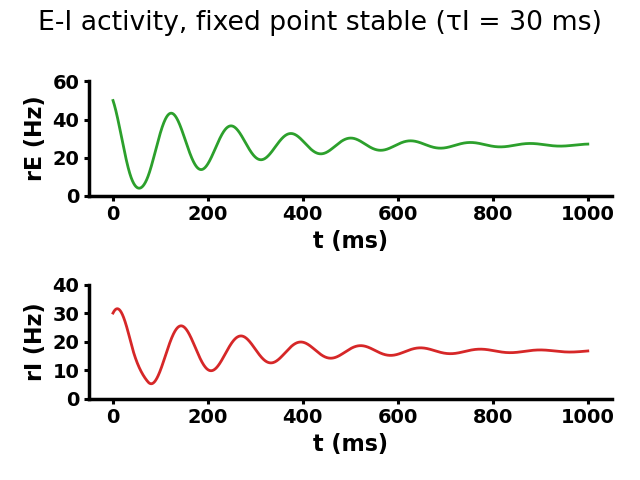

In [45]:
_, _, _ = plot_rates(title='E-I activity, fixed point stable (τI = 30 ms)', tauI=30)

For $τ_Ι = 30 ms$, the excitatory and inhibitory firing rates gradually settle to a single stable fixed point $(\boldsymbol{r_{E}} = 26.67, \boldsymbol{r_{I}} = 16.67)$ that can be analytically derived as follows:

\begin{align}
\frac{dr_{E}}{dt} &= (-r_{E} + R(M_{EE}r_{E}+M_{EI}{r}_{I} - \gamma_{E})) / \tau_E = 0 \Rightarrow r_{E} = 4r_{I} - 40 \Rightarrow r_{E} = 4r_{E} - 80 \Rightarrow \boldsymbol{r_{E}} = 26.67\\ 
\frac{dr_{I}}{dt} &= (-r_{I} + R(M_{IE}r_{E}+M_{II}{r}_{I} - \gamma_{I})) / \tau_I = 0 \Rightarrow r_{I} = r_{E} - 10 \Rightarrow \boldsymbol{r_{I}} = 16.67\\
\end{align}

This above settling is also reflected by the phase-plane analysis, where the trajectory collapses to such a fixed point: 

![](figures/tauI_30_phase_plane.jpg)

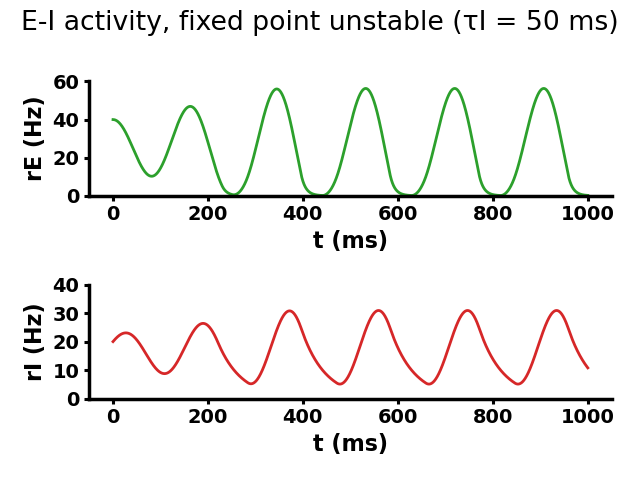

In [32]:
_, _, _ = plot_rates(title='E-I activity, fixed point unstable (τI = 50 ms)', tauI=50)

For $τ_1 = 50 ms$, the excitatory and inhibitory firing rates gradually settle into periodic oscillations.
This is also reflected by the phase-plane analysis, where the trajectory joins the closed orbit limit cycle:

![](figures/tauI_50_phase_plane.jpg)

The stability of a fixed point is determined by the real parts of the eigenvalues (**7.53**) of the stability matrix (**7.52**). In the case Dayan and Abott examine (negative factor under radical sign), oscillations occur **near** the fixed point. As also seen above, the trajectory either spirals into the fixed point (stable), if $Re\{\boldsymbol{λ}\} < 0$, or expands outward from the fixed point (unstable) until the system enters a limit cycle, if $Re\{\boldsymbol{λ}\} > 0$. Based on the real part plot of one of these eigenvalues:

![](figures/eigenvalue_real_part_plot.jpg)

$τ_Ι = 40 ms$ (where $Re\{\boldsymbol{λ}\} = 0$) indicates the transition time point between such inward spiralling and outward expanding behavior, where rate and oscillation frequency remain constant in $t$, as seen below.

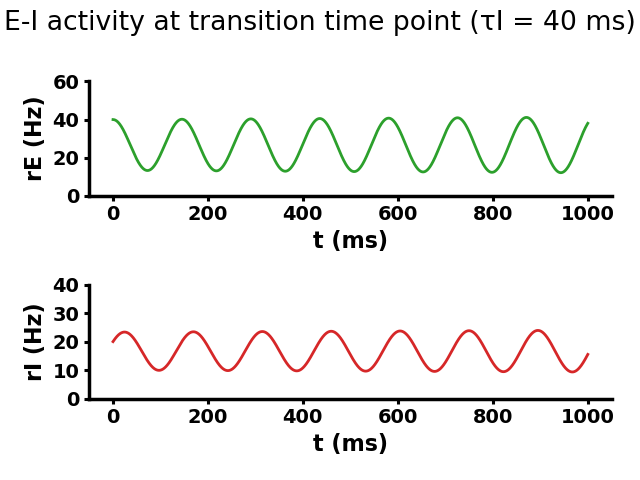

In [33]:
_, _, _ = plot_rates(title='E-I activity at transition time point (τI = 40 ms)', tauI=tauI_transition)

- For $τ_Ι < 40 ms$ (where $Re\{\boldsymbol{λ}\} < 0$), firing rates gradually settle from periodic oscillations into a fixed point, as seen in the $τ_Ι = 30 ms$ example.
- For $τ_Ι > 40 ms$ (where $Re\{\boldsymbol{λ}\} > 0$), firing rates gradually settle from a fixed point into periodic oscillations, as seen in the $τ_Ι = 50 ms$ example.

### References

**Dayan, P., & Abbott, L. F. (2005)**. Chapter 7: Network Models, Theoretical neuroscience: Computational and Mathematical Modeling of Neural Systems. MIT press.